In [1]:
import dataset
import matplotlib.pyplot as plt
import tree_search

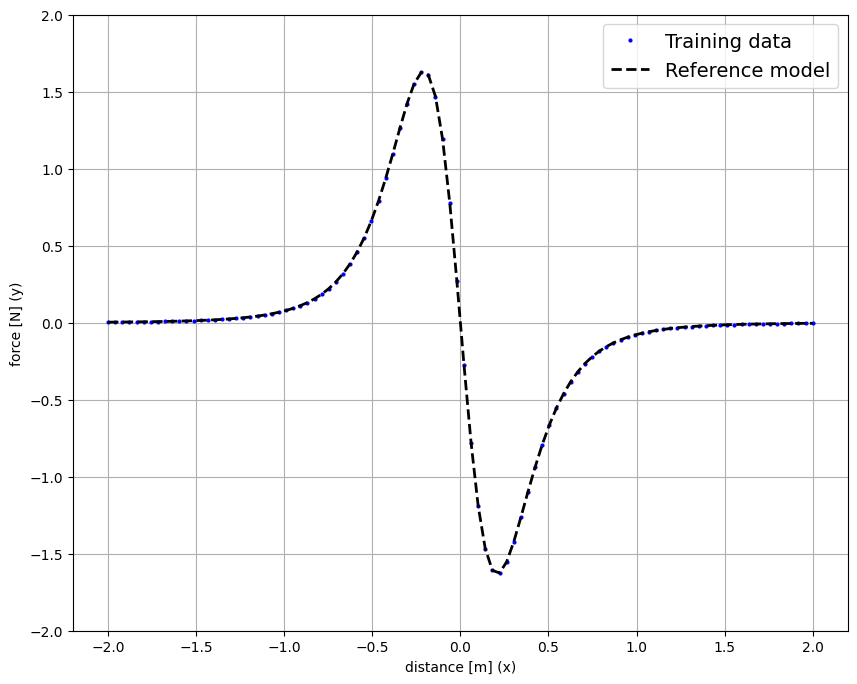

In [2]:
S = dataset.MagmanDatasetScaled()
S.sample(size=100, noise=0.0, mesh=True)
S.plot()

In [3]:
avg, std = tree_search.compute_smoothness(S)
print(f"Avg: {avg}\nStd: {std}")

Avg: -0.0018414805845339871
Std: 3.2432530728419513


In [4]:
"""from pymoo.core.problem import Problem
from pymoo.algorithms.soo.nonconvex.es import ES
from pymoo.optimize import minimize

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=len(S.data), n_obj=1, xl=S.yl, xu=S.yu)

    def _evaluate(self, x, out, *args, **kwargs):
        evals = []
        for sol in x:
            slopes = []
            n = len(sol)
            for i in range(1, n):
                beta_i   = math.log(S.data[i].y, sol[i])
                beta_i_1 = math.log(S.data[i - 1].y, sol[i - 1])
                slopes.append( (beta_i - beta_i_1) / (1) )
                slopes.append( (sol[i] - sol[i-1]) / (1) )
            evals.append(np.std(slopes))
        
        out["F"] = np.row_stack(evals)

algorithm = ES(n_offsprings=200, pop_size=50)

res = minimize(MyProblem(),
               algorithm,
               ("n_gen", 5000),
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))"""

'from pymoo.core.problem import Problem\nfrom pymoo.algorithms.soo.nonconvex.es import ES\nfrom pymoo.optimize import minimize\n\nclass MyProblem(Problem):\n\n    def __init__(self):\n        super().__init__(n_var=len(S.data), n_obj=1, xl=S.yl, xu=S.yu)\n\n    def _evaluate(self, x, out, *args, **kwargs):\n        evals = []\n        for sol in x:\n            slopes = []\n            n = len(sol)\n            for i in range(1, n):\n                beta_i   = math.log(S.data[i].y, sol[i])\n                beta_i_1 = math.log(S.data[i - 1].y, sol[i - 1])\n                slopes.append( (beta_i - beta_i_1) / (1) )\n                slopes.append( (sol[i] - sol[i-1]) / (1) )\n            evals.append(np.std(slopes))\n        \n        out["F"] = np.row_stack(evals)\n\nalgorithm = ES(n_offsprings=200, pop_size=50)\n\nres = minimize(MyProblem(),\n               algorithm,\n               ("n_gen", 5000),\n               seed=1,\n               verbose=False)\n\nprint("Best solution found: \

In [5]:
#alphas, betas, _, _ = tree_search.infer_operator(S, opt='pow')
#print(alphas)
#print(betas)

"""import sympy
x = sympy.Symbol("x")
res = sympy.nsolve((x ** 2) + 1, x, 23, verify=False)
print(res)"""

"""alphas, betas = tree_search.infer_operator_slq_optimz(S, opt='sum')
print("___SOLUTION___")
print(alphas)
print(betas)"""

alphas, betas, inter_points, mse = tree_search.infer_poly(S, max_degree=6, comb_func=lambda a,b : a/b)
print("___SOLUTION___")
print(alphas)
print(betas)
print(f"MSE: {mse}")

Result: [-2.79332929e-07 -3.00547189e+04 -6.22326778e-06  1.31809543e-06
  1.99526611e-06 -2.58598466e-07 -2.27745123e-07  2.22065434e+03
  2.05974177e-06  3.07160181e+04 -3.75525831e-06  1.41620985e+05
  6.25130465e-05  2.17655202e+05]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
___SOLUTION___
[60109.43771805836, 58895.10564273853, 57680.7735674222, 56466.441492113074, 55252.10941681431, 54037.77734152862, 52823.445266258226, 51609.113191004944, 50394.781115770165, 49180.449040554915, 47966.11696535989, 46751.78489018544, 45537.452815031604, 44323.120739898186, 43108.78866478473, 41894.45658969054, 40680.12451461471, 39465.79243955622, 38251.46036451376, 37037.12828948601, 35822.79621447146, 34608.4641394685, 33394.13206447548, 32179.799989490606, 30965.46791451212, 29751.135839538154, 28536.80376456688, 27322.471689596427, 26108.13961462495, 24893.80753965062, 23679.475464671646, 22465.143389686273, 21250.81131469283, 20036.479239689674, 188

-2.0, 0.0036829611690682995
2.0, -0.0036829611690680775
-1.9191919191919191, 0.004466896567406398
1.393939393939394, -0.019100856566831803
-0.10101010101010077, 1.1909768587361294
1.5555555555555558, -0.011718598072253172
0.666666666666667, -0.3182666403102101
1.7979797979797985, -0.006048038717160198
-0.505050505050505, 0.6633600594600302
-0.9494949494949494, 0.09371527419964831
1.5555555555555558, -0.011718598072253172
-0.46464646464646453, 0.7914964559905844
0.1818181818181821, -1.6078239651595698
1.3131313131313136, -0.024787863304239988


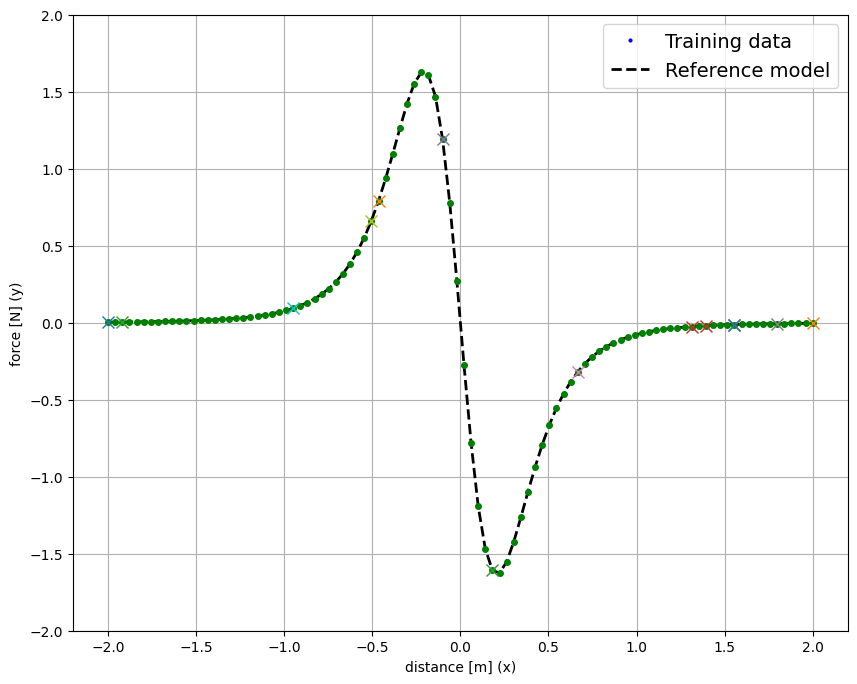

In [6]:
S.plot()
n = len(S.data)

if len(alphas) == n and len(betas) == n:
    for i in range(n):
        alpha = alphas[i] #res.X[i]
        beta  = betas[i]  #math.log(S.data[i].y, res.X[i])
        plt.plot(S.data[i].x, alpha, 'ro', markersize=4, label='alpha')
        plt.plot(S.data[i].x, beta, 'bo', markersize=4, label='beta')
        plt.plot(S.data[i].x, alpha / beta, 'go', markersize=4, label='beta')

    #plt.ylim(( min(min(alphas), min(betas)), max(max(alphas), max(betas)) ))
    
    for dp in inter_points:
        plt.plot(dp.x, dp.y, 'x', markersize=8, label='inter_point')
        print(f"{dp.x}, {dp.y}")